# Eplepsia

## Definição
É uma alteração temporária e reversível do funcionamento do cérebro, que não tenha sido causada por febre, drogas ou distúrbios metabólicos. Durante alguns segundos ou minutos, uma parte do cérebro emite sinais incorretos, que podem ficar restritos a esse local ou espalhar-se. Se ficarem restritos, a crise será chamada parcial; se envolverem os dois hemisférios cerebrais, generalizada. Por isso, algumas pessoas podem ter sintomas mais ou menos evidentes de epilepsia, não significando que o problema tenha menos importância se a crise for menos aparente.

 

## Sintomas
Em crises de ausência, a pessoa apenas apresenta-se “desligada” por alguns instantes, podendo retomar o que estava fazendo em seguida. Em crises parciais simples, o paciente experimenta sensações estranhas, como distorções de percepção ou movimentos descontrolados de uma parte do corpo. Ele pode sentir um medo repentino, um desconforto no estômago, ver ou ouvir de maneira diferente. Se, além disso, perder a consciência, a crise será chamada de parcial complexa. Depois do episódio, enquanto se recupera, a pessoa pode sentir-se confusa e ter déficits de memória. Tranqüilize-a e leve-a para casa se achar necessário. Em crises tônico-clônicas, o paciente primeiro perde a consciência e cai, ficando com o corpo rígido; depois, as extremidades do corpo tremem e contraem-se. Existem, ainda, vários outros tipos de crises. Quando elas duram mais de 30 minutos sem que a pessoa recupere a consciência, são perigosas, podendo prejudicar as funções cerebrais.

## Diagnóstico
Exames como eletroencefalograma (EEG) e neuroimagem são ferramentas que auxiliam no diagnóstico. O histórico clínico do paciente, porém, é muito importante, já que exames normais não excluem a possibilidade de a pessoa ser epiléptica. Se o paciente não se lembra das crises, a pessoa que as presencia torna-se uma testemunha útil na investigação do tipo de epilepsia em questão e, conseqüentemente, na busca do tratamento adequado.

## Target

O dataset original da UCO contém 5 rótulos para a variável target, descritas abaixo:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

Como o intuito do estudo é prever a ocorrência ou não de episódio eplético, vamos colocar ocorrência 1 como positivo e 0 negativo.

## Fonte:  https://epilepsia.org.br/o-que-e-epilepsia/
## Dataset: https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

In [29]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importando o dataframe
data = pd.read_csv('dados_originais.csv')

In [3]:
#verificando as 5 primeiras linhas
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
#retirando a coluna Unnamed:0
data.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
#verificando o número de linhas e colunas
data.shape

(11500, 179)

In [6]:
#Verificando se há dados nan
data.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [7]:
#Verificando os tipos das colunas
data.dtypes

X1      int64
X2      int64
X3      int64
X4      int64
X5      int64
        ...  
X175    int64
X176    int64
X177    int64
X178    int64
y       int64
Length: 179, dtype: object

In [8]:
#Observando a quantidade por target
data['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [9]:
# Como o intuito do estudo é prever a ocorrência ou não de episódio eplético, vamos colocar ocorrência 1 
#como positivo e 0 negativo.

def variavel_target (valor):
    if valor.values.item() != 1:
        return 'nao'
    else:
        return 'sim'
    


In [10]:
#Introdução de coluna target
data['target'] = data[['y']].apply(variavel_target, axis =1)

In [11]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,target
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,4,nao
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,sim
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,5,nao
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,5,nao
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,5,nao


In [12]:
#Drop da coluna y:
data.drop('y', axis = 1, inplace=True)

In [13]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,nao
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,sim
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,nao
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,nao
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,nao


In [14]:
#Transformando a variável target em numérica
data['target'] = data['target'].astype('category')
data['target'] = data['target'].cat.codes

In [15]:
#Realizando a correlação
data.corr()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,...,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022,-0.031262
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,...,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059,-0.024503
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,...,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419,-0.015615
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,...,-0.001028,0.000632,0.006617,0.011882,0.014496,0.016992,0.016911,0.014671,0.006226,-0.002149
X5,0.393674,0.576579,0.778648,0.938636,1.000000,0.941267,0.792304,0.596424,0.410651,0.265112,...,0.004861,0.000918,0.006488,0.013946,0.019146,0.021924,0.018869,0.013607,0.001298,0.013362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X175,0.036144,0.024290,0.015536,0.016992,0.021924,0.022444,0.014869,-0.000510,-0.018552,-0.036517,...,0.195640,0.366428,0.573335,0.782018,0.936986,1.000000,0.933893,0.759069,0.533265,-0.038926
X176,0.030581,0.023906,0.016982,0.016911,0.018869,0.020977,0.017016,0.005851,-0.009052,-0.025522,...,0.084966,0.195891,0.359400,0.563321,0.767300,0.933893,1.000000,0.931826,0.759381,-0.037875
X177,0.024562,0.021962,0.017070,0.014671,0.013607,0.017383,0.018572,0.012590,0.001943,-0.011809,...,0.022042,0.071946,0.175322,0.337020,0.537493,0.759069,0.931826,1.000000,0.934330,-0.037212
X178,0.020022,0.018059,0.012419,0.006226,0.001298,0.004240,0.008325,0.008032,0.004823,-0.001332,...,-0.004094,0.001945,0.049854,0.155044,0.315385,0.533265,0.759381,0.934330,1.000000,-0.035855


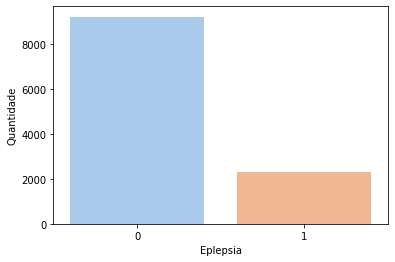

In [16]:
#Verificando o balanceamento da variável target

sns.set_palette('pastel')
ax = sns.countplot(x= 'target', data = data, )
ax.set(xlabel='Eplepsia', ylabel='Quantidade')
plt.show()


In [17]:
#Separando as variáveis em treino e teste
x = data.drop('target', axis = 1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 121)


In [18]:
#Verificando se foi realizada de maneira correta
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8050, 178), (3450, 178), (8050,), (3450,))

In [19]:
#Balanceando a variável target

smote_bal = SMOTE(random_state = 121)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X_train, y_train)

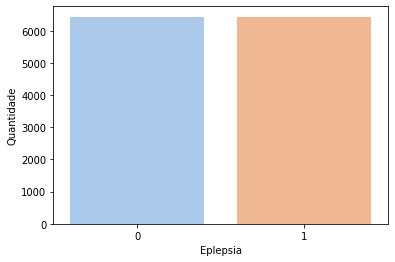

In [20]:
#Verificando se o balaneceamento está correto
sns.set_palette('pastel')
ax = sns.countplot(x= y_res, data = data, )
ax.set(xlabel='Eplepsia', ylabel='Quantidade')
plt.show()

In [21]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(X_res)
xscaled_test = scaler.transform(X_test)

# V1- Regressão Logística 

In [22]:
clf = LogisticRegression( max_iter = 200,random_state=0).fit(xscaled, y_res)

In [23]:
y_pred = clf.predict(xscaled_test)

In [24]:
clf.score(xscaled_test, y_test)

0.7095652173913043

In [25]:
# Relatório de classificação
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2764
           1       0.33      0.43      0.37       686

    accuracy                           0.71      3450
   macro avg       0.59      0.61      0.59      3450
weighted avg       0.74      0.71      0.72      3450



In [26]:
# Score AUC
print(roc_auc_score(y_test, y_pred))

0.6061302544586161


In [28]:
## V2- Random Forest

In [34]:
clf = RandomForestClassifier(max_depth=5, random_state=121).fit(X_res,y_res)

In [35]:
clf_test = clf.predict(X_test)

In [41]:
clf.score(X_test,y_test)

0.9481159420289855

In [43]:
# Relatório de classificação
report = classification_report(y_test,clf_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2764
           1       0.85      0.90      0.87       686

    accuracy                           0.95      3450
   macro avg       0.91      0.93      0.92      3450
weighted avg       0.95      0.95      0.95      3450



In [44]:
# Score AUC
print(roc_auc_score(y_test, clf_test))

0.9314536544408955


In [ ]:
# Calcula a Curva ROC para cada classe
y_probs = clf.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(y_teste, y_probs_v3)
plt.show()